## 1st task

Таблица df_1 является обучающей, для df_2 спрогнозированны Revenue и количества Download. 
<br>1) Это видно по данным: для всех признаков которые есть в обучающей выборке, есть спрогнозированные значения.
<br>2) К тому же, если сделать inner join таблиц для сравнения данных по store, store_application_id, countru, date, то получим меньший разброс для данных с df_2 (что и должно происходить с моделированными данными с идентичными признаками)

## 2nd task

В таблицах колонки:
<br>    • Store – зашифрованный стор приложения
<br>    • Country – страна приложения
<br>    • Store_application_id – зашифрованный айди приложения (чтоб отличать приложение A от приложения B)
<br>    • Date – дата, по которой взят срез 
<br>   • Downloads – количество инсталлов приложения N в стране M в дату D
<br>    • Revenue – ревенью  приложения N в стране M в дату D
<br>    • Top_free – какое место занимает приложение N в стране M в дату D, если все приложения упорядочить от приложения с максимальным количеством инсталлов (1 место)  до приложения с минимальным количеством инсталлов (minN место)
<br>    • Top_grossing – какое место занимает приложение N в стране M в дату D, если все приложения упорядочить от приложения с максимальным  revenue (1 место)  до приложения с минимальным revenue
<br>    • Created_at – время, когда создана конкретная запись

In [41]:
import pandas

In [42]:
df=pandas.read_csv('df_1_test.csv')
df.rename(columns={'Unnamed: 0':'obs'}, inplace=True)
df.head()

# считываем первую таблицу

,obs,store,country,store_application_id,date,top_free,top_grossing,revenue,downloads,created_at
0,0,1,AE,1,2018-02-01,7538.0,NaN,NaN,30.0,2018-12-06 19:37:17
1,1,1,AE,1,2018-02-02,7084.0,NaN,NaN,31.0,2018-12-06 19:41:18
2,2,1,AE,1,2018-02-03,8427.0,NaN,NaN,25.0,2018-12-06 19:45:01
3,3,1,AE,1,2018-02-04,7842.0,722.0,11.0,26.0,2018-12-06 19:48:48
4,4,1,AE,1,2018-02-05,8721.0,439.0,21.0,22.0,2018-12-06 19:52:48


In [43]:
df=df.loc[df['country']=='US']
# Выбираем только США
df['date']=pandas.to_datetime(df['date'])

df.describe()

,obs,store,store_application_id,top_free,top_grossing,revenue,downloads
count,10303.000000,10303.0,10303.000000,10276.000000,10059.000000,10054.000000,10276.000000
mean,191607.333010,1.0,3.000388,6936.898696,5453.341684,585.794291,1245.660393
std,105487.925532,0.0,1.414145,7409.739441,7757.610699,887.865659,1646.964191
min,8952.000000,1.0,1.000000,68.000000,208.000000,1.000000,12.000000
25%,98641.500000,1.0,2.000000,1978.000000,597.000000,17.000000,248.000000
50%,191232.000000,1.0,3.000000,3818.000000,2023.000000,115.000000,694.000000
75%,284477.500000,1.0,4.000000,8982.000000,7123.500000,931.000000,1610.000000
max,378655.000000,1.0,5.000000,43327.000000,57732.000000,4909.000000,22407.000000


In [44]:
df=df.dropna()
df.describe()

#удаляем строки с пустыми значениями, чтобы можно было правильно метрики по времени сравнивать

,obs,store,store_application_id,top_free,top_grossing,revenue,downloads
count,10027.000000,10027.0,10027.000000,10027.000000,10027.000000,10027.000000,10027.000000
mean,191629.426648,1.0,2.950833,6483.197467,5440.792460,586.769014,1273.818789
std,105493.883847,0.0,1.396498,6812.200591,7748.175872,888.557775,1657.137511
min,8952.000000,1.0,1.000000,68.000000,208.000000,1.000000,12.000000
25%,98641.500000,1.0,2.000000,1946.000000,596.000000,17.000000,263.950000
50%,191224.000000,1.0,3.000000,3701.000000,2020.000000,115.000000,727.000000
75%,284478.500000,1.0,4.000000,8518.500000,7109.000000,933.000000,1642.500000
max,378655.000000,1.0,5.000000,42059.000000,57732.000000,4909.000000,22407.000000


## 1-ое приложение

/home/ayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'top_free')

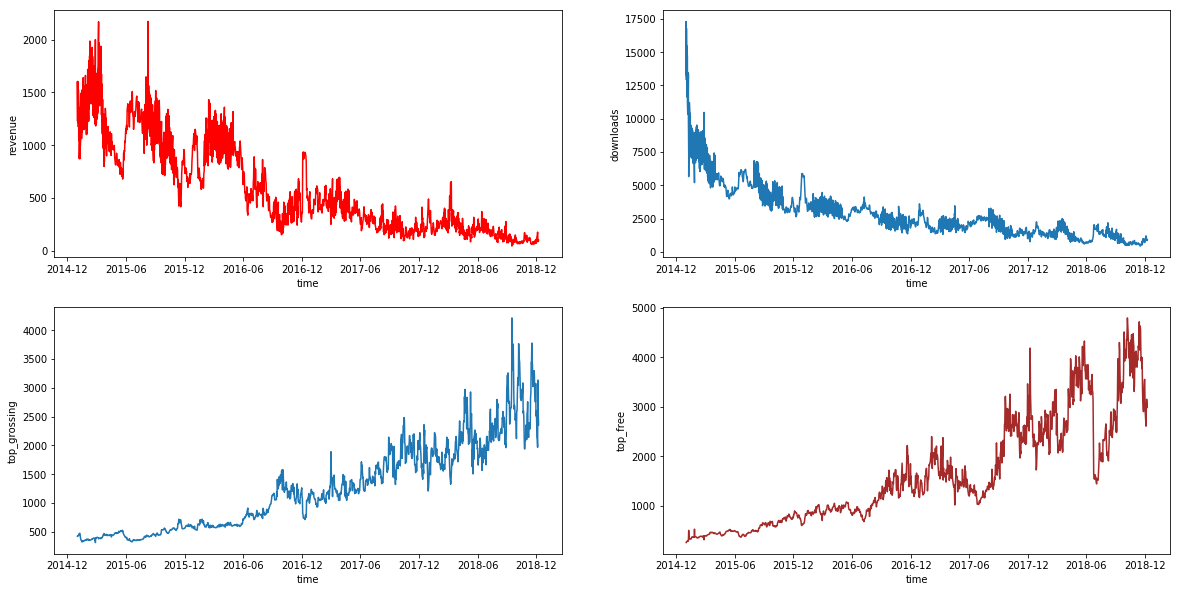

In [60]:
df_1=df.loc[df['store_application_id']==1]
df_1.sort_values(by='date', inplace=True)

plt.figure(1,figsize=(20,10))

plt.subplot(221)
plt.plot(df_1['date'],df_1['revenue'], color='red')
plt.xlabel('time')
plt.ylabel('revenue')

plt.subplot(222)
plt.plot(df_1['date'],df_1['downloads'])
plt.xlabel('time')
plt.ylabel('downloads')

plt.subplot(223)
plt.plot(df_1['date'],df_1['top_grossing'])
plt.xlabel('time')
plt.ylabel('top_grossing')

plt.subplot(224)
plt.plot(df_1['date'],df_1['top_free'], color='brown')
plt.xlabel('time')
plt.ylabel('top_free')

## 2 приложение

/home/ayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'top_free')

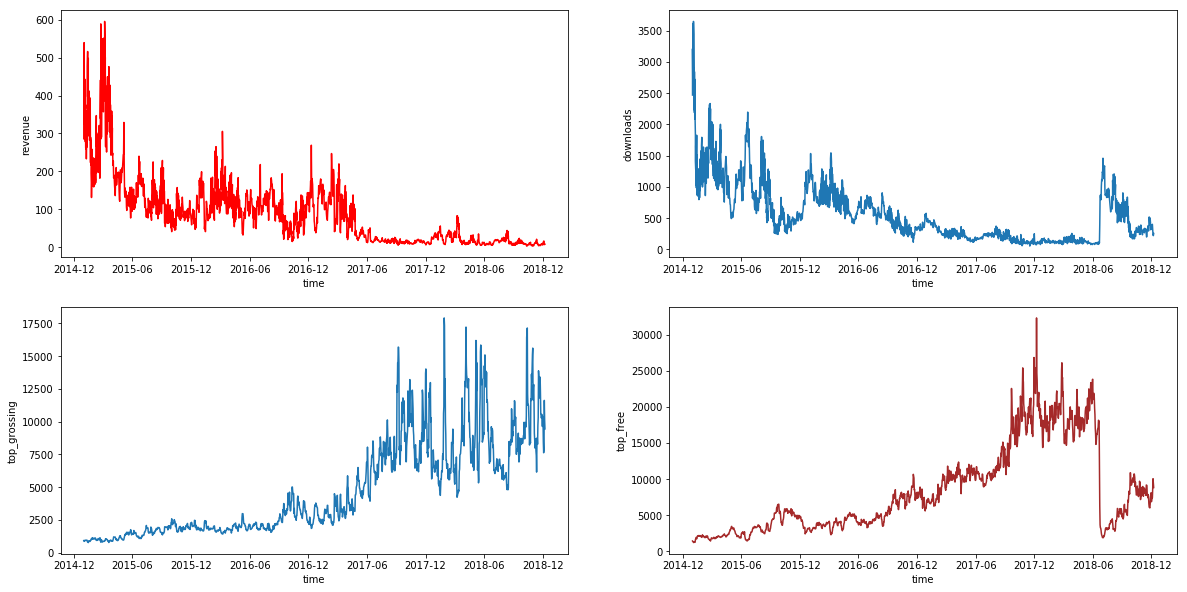

In [59]:
df_2=df.loc[df['store_application_id']==2]
df_2.sort_values(by='date', inplace=True)


plt.figure(1,figsize=(20,10))

plt.subplot(221)
plt.plot(df_2['date'],df_2['revenue'], color='red')
plt.xlabel('time')
plt.ylabel('revenue')

plt.subplot(222)
plt.plot(df_2['date'],df_2['downloads'])
plt.xlabel('time')
plt.ylabel('downloads')

plt.subplot(223)
plt.plot(df_2['date'],df_2['top_grossing'])
plt.xlabel('time')
plt.ylabel('top_grossing')

plt.subplot(224)
plt.plot(df_2['date'],df_2['top_free'],color='brown')
plt.xlabel('time')
plt.ylabel('top_free')

## 3 приложение

In [62]:
df_3=df.loc[df['store_application_id']==3]
df_3.sort_values(by='date', inplace=True)

/home/ayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'top_free')

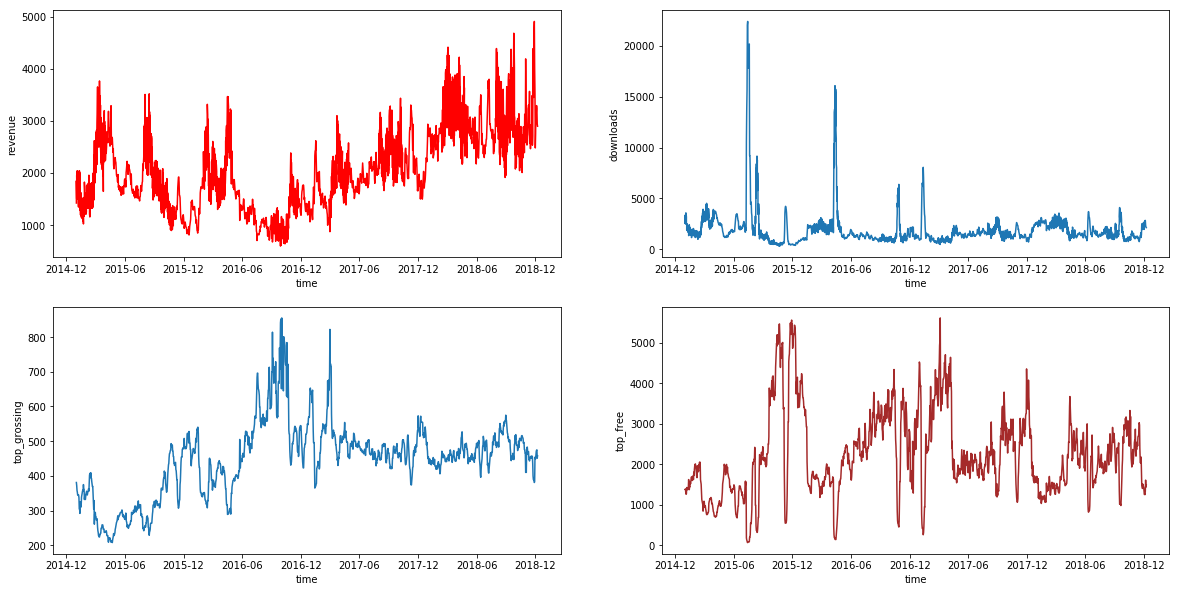

In [63]:
plt.figure(1,figsize=(20,10))

plt.subplot(221)
plt.plot(df_3['date'],df_3['revenue'], color='red')
plt.xlabel('time')
plt.ylabel('revenue')

plt.subplot(222)
plt.plot(df_3['date'],df_3['downloads'])
plt.xlabel('time')
plt.ylabel('downloads')

plt.subplot(223)
plt.plot(df_3['date'],df_3['top_grossing'])
plt.xlabel('time')
plt.ylabel('top_grossing')

plt.subplot(224)
plt.plot(df_3['date'],df_3['top_free'],color='brown')
plt.xlabel('time')
plt.ylabel('top_free')

## 4 приложение

/home/ayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'top_free')

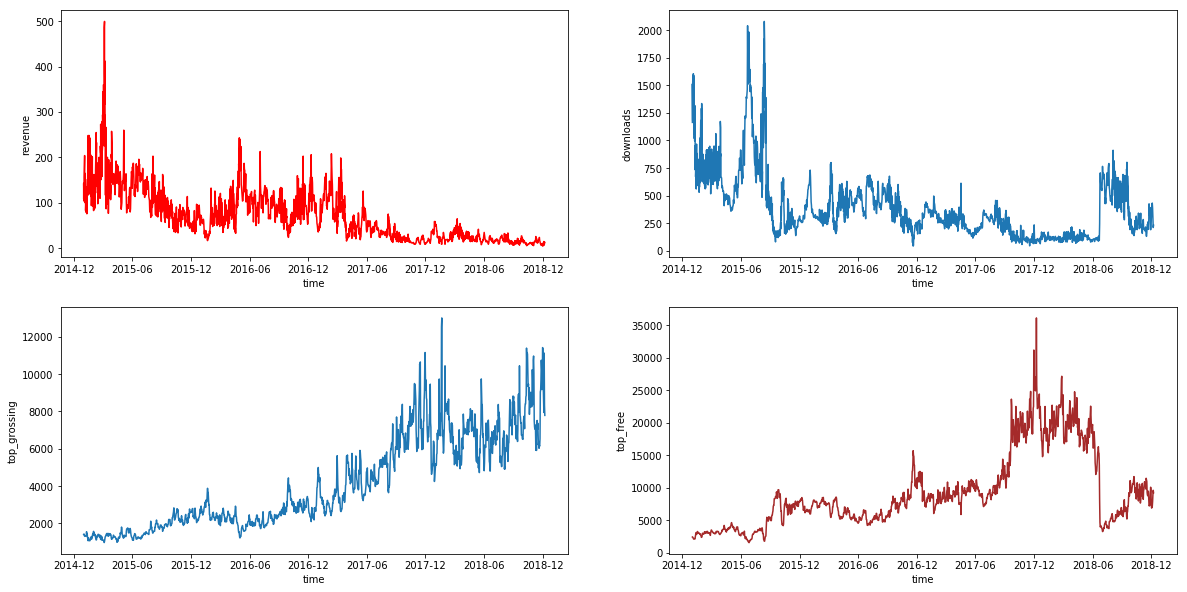

In [64]:
df_4=df.loc[df['store_application_id']==4]
df_4.sort_values(by='date', inplace=True)


plt.figure(1,figsize=(20,10))

plt.subplot(221)
plt.plot(df_4['date'],df_4['revenue'], color='red')
plt.xlabel('time')
plt.ylabel('revenue')

plt.subplot(222)
plt.plot(df_4['date'],df_4['downloads'])
plt.xlabel('time')
plt.ylabel('downloads')

plt.subplot(223)
plt.plot(df_4['date'],df_4['top_grossing'])
plt.xlabel('time')
plt.ylabel('top_grossing')

plt.subplot(224)
plt.plot(df_4['date'],df_4['top_free'],color='brown')
plt.xlabel('time')
plt.ylabel('top_free')

## 5 приложение

/home/ayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'top_free')

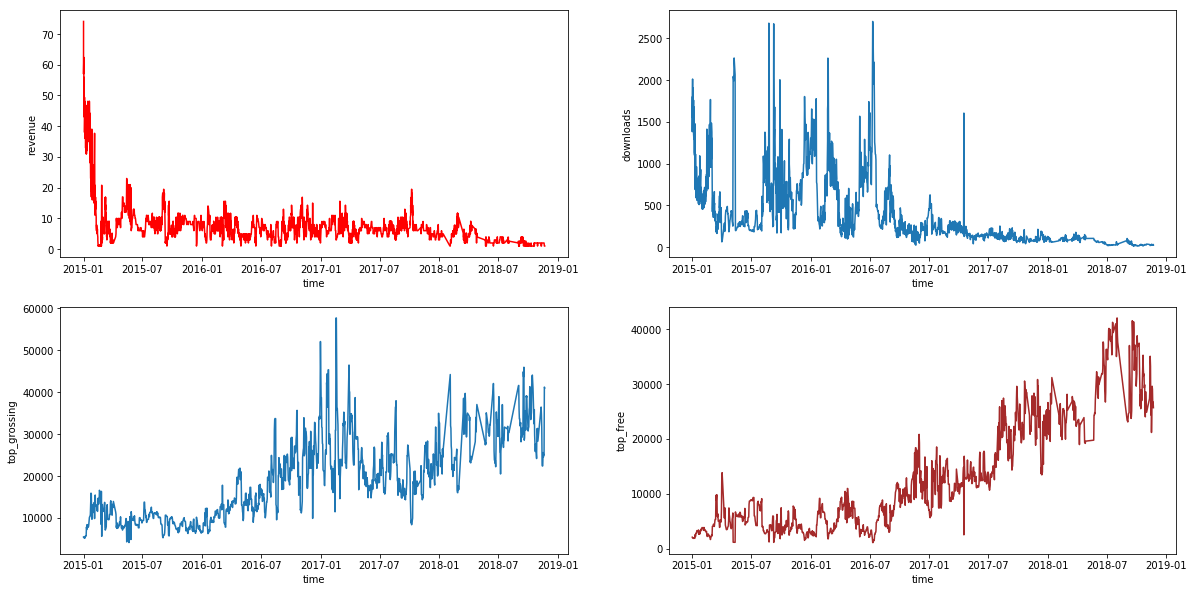

In [65]:
df_5=df.loc[df['store_application_id']==5]
df_5.sort_values(by='date', inplace=True)


plt.figure(1,figsize=(20,10))

plt.subplot(221)
plt.plot(df_5['date'],df_5['revenue'], color='red')
plt.xlabel('time')
plt.ylabel('revenue')

plt.subplot(222)
plt.plot(df_5['date'],df_5['downloads'])
plt.xlabel('time')
plt.ylabel('downloads')

plt.subplot(223)
plt.plot(df_5['date'],df_5['top_grossing'])
plt.xlabel('time')
plt.ylabel('top_grossing')

plt.subplot(224)
plt.plot(df_5['date'],df_5['top_free'],color='brown')
plt.xlabel('time')
plt.ylabel('top_free')

### Выводы:
#### 1) У 1-го приложение похоже просто падает популярность (в связи с этим падают количество скачиваний, доходы) 
#### 2) 4 приложение по метрикам в разрезе времени схоже со 2-ым. Также, в июне 2018 года у обоих приложений заметно растет количество скачиваний и рейтинг. Хотя это не влияет на доходность
#### 3) Как видно из графиков, 3 приложение в данный момент (и в среднем) и самое прибыльное и самое скачиваемое
#### 4) 5 приложение за весь период приносит наименьшие доходы, хотя по количеству скачиваний оно относительно среднее приложение 


## <h1><center>LAST TASK</center></h1>


По метрике revenue наибольшая ошибка в приложении 3 (в США),а по метрике downloads в приложении 5 (в России).
<br> Тогда как разброс с 2016 года начинает увеличиваться в приложении 3 в США, разброс и наблюдения в 5 приложении в России из года в год уменьшаются

In [1]:
import pandas

In [2]:
df_1=pandas.read_csv('df_1_test.csv')
df_2=pandas.read_csv('df_2_test.csv')
df_1.rename(columns={'Unnamed: 0':'obs_1','top_free':'top_free_1', \
                     'top_grossing':'top_grossing_1','revenue':'revenue_1',\
                     'downloads':'downloads_1','created_at':'created_at_1'}, inplace=True)
df_2.rename(columns={'Unnamed: 0':'obs'}, inplace=True)
# Чтобы было удобно делать inner join

In [3]:
m_table=pandas.merge(df_1,df_2,on=['store','store_application_id','country','date'])
# делаем inner join по данным ключам

In [4]:
m_table=m_table[['country','store_application_id','date','revenue_1','downloads_1','revenue','downloads']]
# выбираем только нужные колонки. Нам нужно в итоге сравнить насколько ошибается модель
# и провести узнать страну и период времени(если такой есть) в котором ошибка наиболее
# заметная

m_table=m_table.dropna()
# удалить отсутствующие значения, так как отсутсвие каких либо данных
# не позволит сделать анализ, описанный выше

In [5]:
m_table.describe()
# статистика по данным

,store_application_id,revenue_1,downloads_1,revenue,downloads
count,132990.000000,132990.000000,132990.000000,132990.000000,132990.000000
mean,2.325107,76.209646,680.876090,67.673546,618.796331
std,1.109315,288.764844,1440.244721,252.952550,1290.808762
min,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,7.000000,48.100000,3.962117,48.000000
50%,3.000000,17.000000,168.000000,13.113194,155.000000
75%,3.000000,46.000000,620.000000,41.593320,573.000000
max,5.000000,4909.000000,24547.900000,6852.452505,35422.000000


In [6]:
sse_rev=[]
sse_down=[]
# создаем листы, куда будем записывать оишбки 5 приложений

In [7]:
for i in range(1,6):
    X=m_table.loc[m_table['store_application_id']==i]
    a=X[['revenue']]
    b=X[['revenue_1']]
    b.rename(columns={'revenue_1':'revenue'}, inplace=True)
    sse_rev.append(((a.subtract(b))**2).sum(0)/len(a))
    
    c=X[['downloads']]
    d=X[['downloads_1']]
    d.rename(columns={'downloads_1':'downloads'}, inplace=True)
    sse_down.append(((c.subtract(d))**2).sum(0)/len(c))
    
# ошибку считаем через MSE(mean squared error)

/home/ayan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [8]:
sse_rev=pandas.DataFrame(data=sse_rev)
sse_down=pandas.DataFrame(data=sse_down)
display(sse_rev)
# выводим ошибки по метрике Revenue

,revenue
0,3224.850885
1,1234.605305
2,13403.464682
3,808.182021
4,32.550217


Text(0,0.5,'MSE')

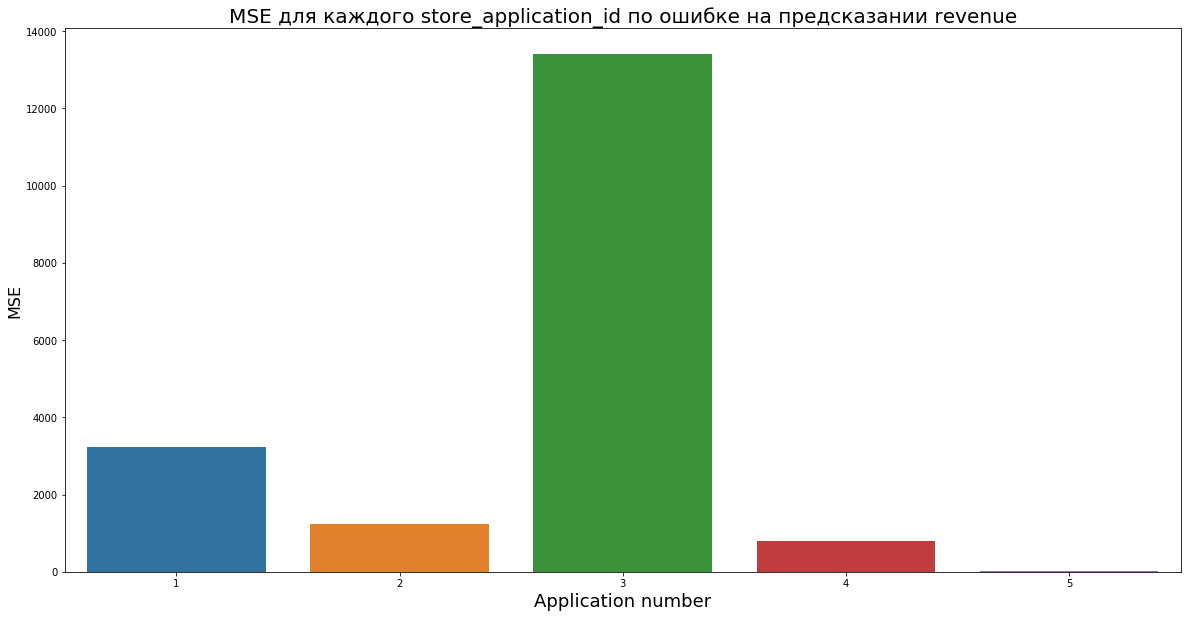

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

#отрисовываем
plt.figure(figsize=(20,10))
ax = sns.barplot(list(range(1,6)),sse_rev['revenue'])
plt.title('MSE для каждого store_application_id по ошибке на предсказании revenue',fontsize=20)
plt.xlabel('Application number', fontsize=18)
plt.ylabel('MSE', fontsize=16)

In [10]:
display(sse_down)
# выводим ошибки по метрике Downloads

,downloads
0,239361.724726
1,42235.508943
2,360393.169637
3,122169.416820
4,434899.156620


Text(0,0.5,'MSE')

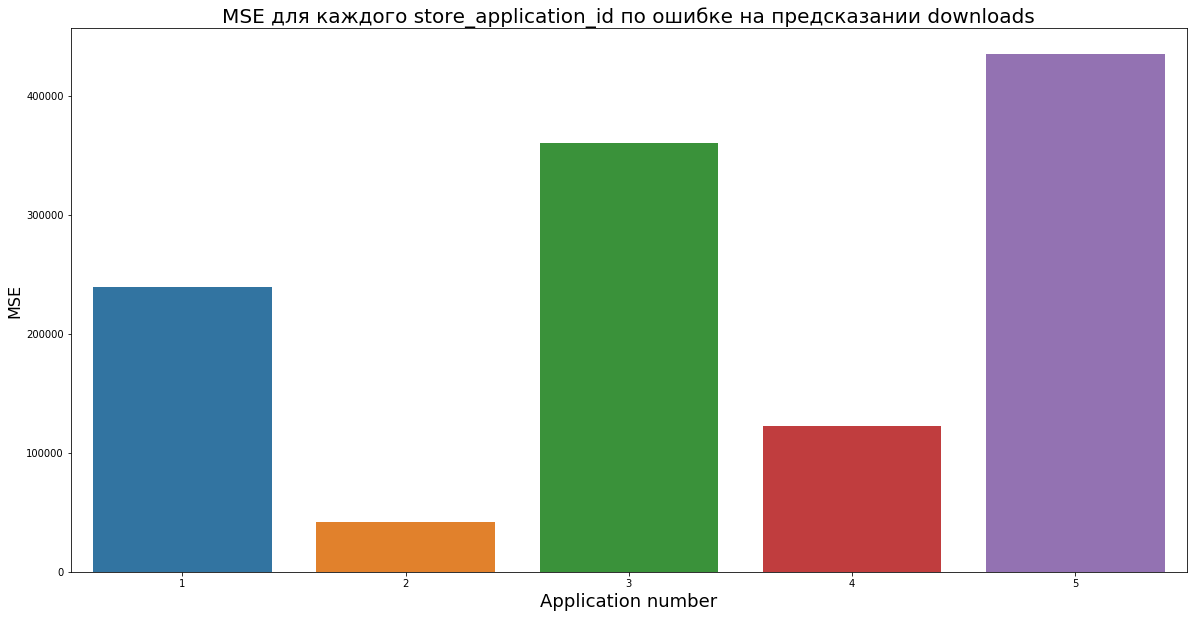

In [11]:
#отрисовываем
plt.figure(figsize=(20,10))
ax = sns.barplot(list(range(1,6)),sse_down['downloads'])
plt.title('MSE для каждого store_application_id по ошибке на предсказании downloads', fontsize=20)
plt.xlabel('Application number', fontsize=18)
plt.ylabel('MSE', fontsize=16)

### Вывод: по метрике Revenue, наибольшая ошибка у 3-го приложения
### По метрике Downloads, наибольшая ошибка у 5-го приложения

### Рассмотрим приложение 3

In [13]:
X_3=m_table.loc[m_table['store_application_id']==3]
# создаем таблицу данных только по 3-му приложению

countries_3=X_3.country.unique()
# создаем массив из уникальных стран

sse_rev_c=[]

In [14]:
for i in countries_3:
    Y=X_3.loc[X_3['country']==i]
    a=Y[['revenue']]
    b=Y[['revenue_1']]
    b.rename(columns={'revenue_1':'revenue'}, inplace=True)
    sse_rev_c.append(((a.subtract(b))**2).sum(0)/len(a))

/home/ayan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [15]:
sse_rev_c=pandas.DataFrame(data=sse_rev_c)
sse_rev_c.rank()

,revenue
0,34.0
1,10.0
2,6.0
3,36.0
4,5.0
5,20.0
6,13.0
7,30.0
8,12.0
9,32.0


In [16]:
countries_3[31]

'US'

In [17]:
X_3['abs_error']=abs(X_3['revenue']-X_3['revenue_1'])

/home/ayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
X_3_US=X_3.loc[X_3['country']=='US']
X_3_US['date'] = pandas.to_datetime(X_3_US['date'])

/home/ayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


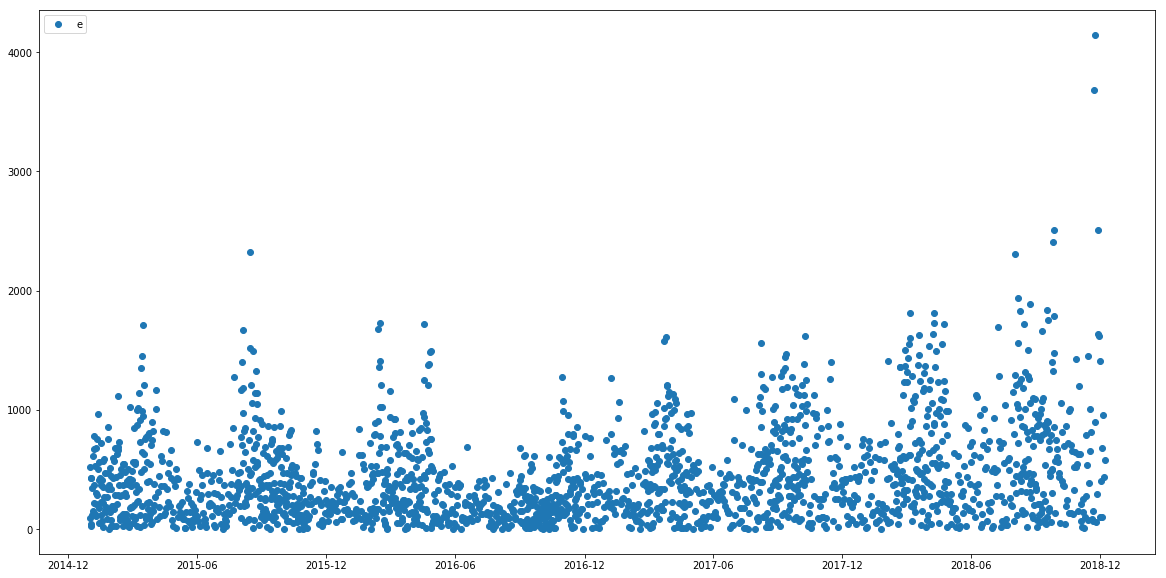

In [19]:
# зависимость средней ошибки от даты 
plt.figure(figsize=(20,10))
plt.plot_date(x=X_3_US['date'], y= X_3_US['abs_error'], fmt='o')
plt.legend('errors', ncol=1, loc='upper left');


### Как мы видим, с 2016 года разброс начинает увеличиваться. Подтвердим это цифрами

In [20]:
X_3_US['year']=X_3_US['date'].dt.year
# создаем столбец который будет показывать год

/home/ayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
std=X_3_US.groupby('year').agg({'abs_error':['std']})
# группируем ошибку по стандартному отклонению

Text(0,0.5,'STD')

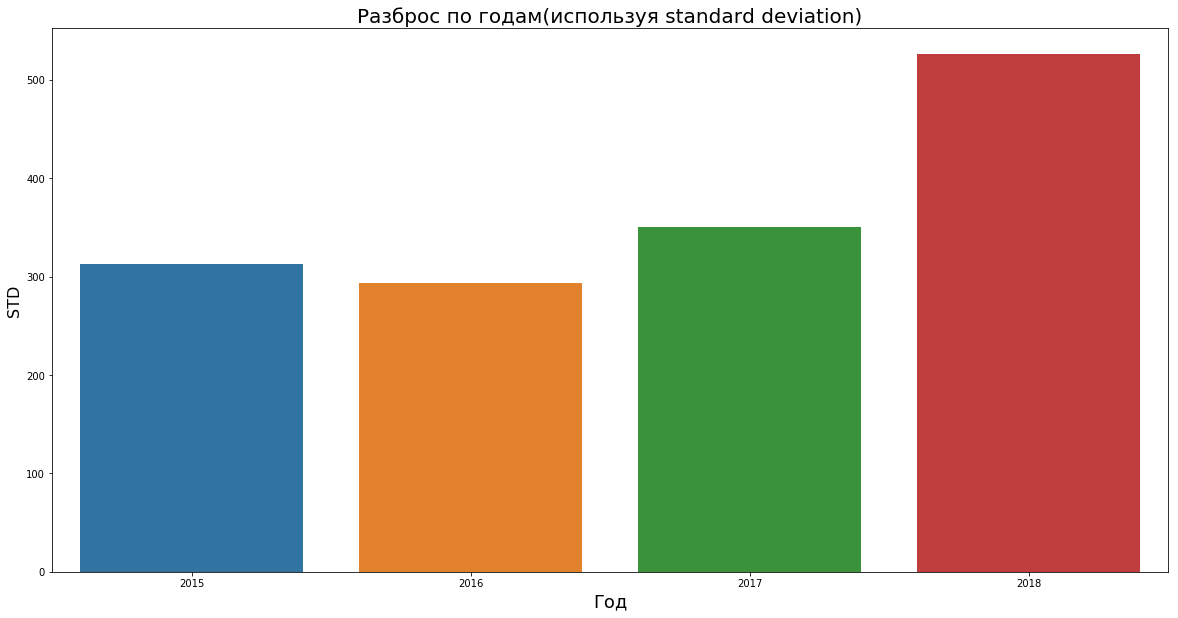

In [22]:
plt.figure(figsize=(20,10))
ax = sns.barplot(list(range(2015,2019)),std['abs_error']['std'])
plt.title('Разброс по годам(используя standard deviation)', fontsize=20)
plt.xlabel('Год', fontsize=18)
plt.ylabel('STD', fontsize=16)

### Рассмотрим приложение 5

In [23]:
X=m_table.loc[m_table['store_application_id']==5]
# создаем таблицу данных только по 5-му приложению

In [24]:
X

,country,store_application_id,date,revenue_1,downloads_1,revenue,downloads
1628,AR,5,2015-01-02,3.0,226.0,0.578512,203.0
1629,AR,5,2015-01-02,3.9,293.8,0.578512,203.0
1646,AR,5,2015-01-11,2.0,284.0,0.578512,210.0
1647,AR,5,2015-01-11,2.6,369.2,0.578512,210.0
2356,AT,5,2015-01-02,1.0,13.0,2.152500,15.0
2357,AT,5,2015-01-02,1.3,16.9,2.152500,15.0
2364,AT,5,2015-01-06,1.0,13.0,1.598333,15.0
2365,AT,5,2015-01-06,1.3,16.9,1.598333,15.0
3210,AU,5,2015-01-01,2.0,8.0,0.566364,36.0
3211,AU,5,2015-01-01,2.6,10.4,0.566364,36.0


In [25]:
countries=X.country.unique()
# создаем массив из уникальных стран
sse_down_c=[]
# сюда будут записываться MSE (ошибки) по каждой стране

In [26]:
for i in countries:   
    Y=X.loc[X['country']==i]
    c=Y[['downloads']]
    d=Y[['downloads_1']]
    d.rename(columns={'downloads_1':'downloads'}, inplace=True)
    sse_down_c.append(((c.subtract(d))**2).sum(0)/len(c))
    
# по той же схеме, что и выше, высчитвыем MSE

/home/ayan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [27]:
sse_down_c=pandas.DataFrame(data=sse_down_c)
sse_down_c.rank()

,downloads
0,23.0
1,3.0
2,14.0
3,15.0
4,18.0
5,7.0
6,24.0
7,27.0
8,26.0
9,22.0


In [28]:
countries[20]
# модель больше всего ошибается

'RU'

In [29]:
X['abs_error']=abs(X['revenue']-X['revenue_1'])
# создаем столбец из ошибок по модулю

X_RU=X.loc[X['country']=='RU']
# выбираем только Россию

X_RU['date'] = pandas.to_datetime(X_RU['date'])

/home/ayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


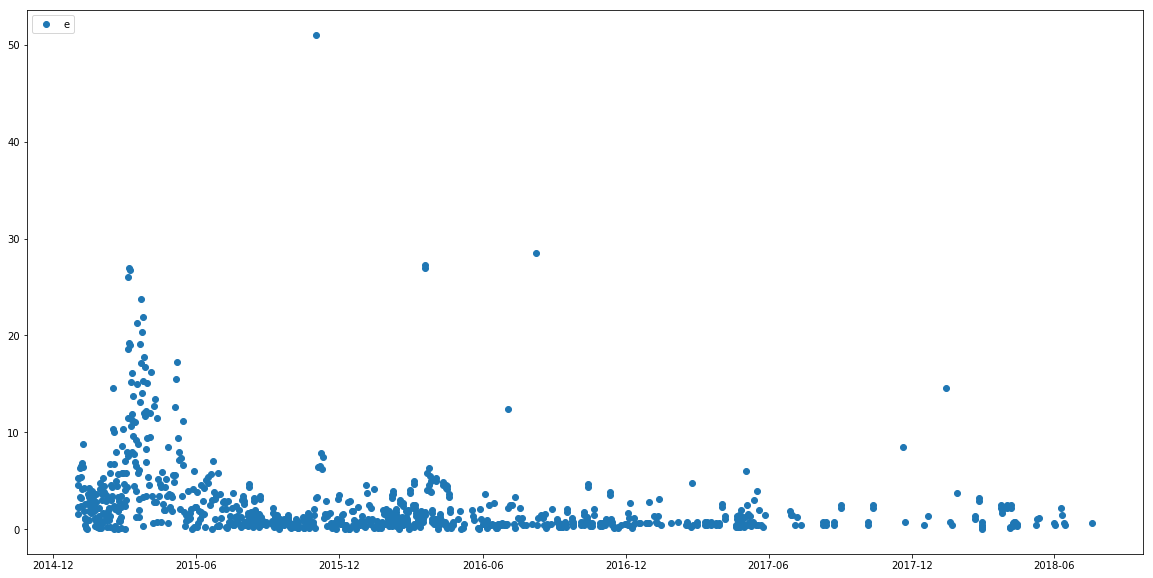

In [30]:
# зависимость средней ошибки от даты 
plt.figure(figsize=(20,10))
plt.plot_date(x=X_RU['date'], y= X_RU['abs_error'], fmt='o')
plt.legend('errors', ncol=1, loc='upper left');

### В основном ошибки наблюдаются в 2015 году. Дальше, количество наблюдений и ошибок падает 